# Dependency-Based Kernels in Twitter Hate Speech Detection
Project mentor: Carlos


Yanzong Yu <yyu80y@jh.edu>, Rodrigo Madero  <rmadero2@jh.edu>, Jack Van Holland <jvanhol1@jh.edu>, Angi Benton <abenton3@jh.edu>

[GitHub Repository](https://github.com/angibenton/ML_Final__Project)


# Outline and Deliverables

## Must accomplish
1. Data preprocessing 
<font color = "green">*completed, see [preprocessing](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=XN1fYEfGidiD&line=4&uniqifier=1)*</font>
2.  70% accuracy on problem 1
<font color = "green">*completed (90%), see [results](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=_Zdp4_H-kx8H)*</font>
3.  Implement a dual SVM <font color = "green">*completed, see ./dualsvm_unused.py, [methods](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=PqB48IF9kMBf&line=14&uniqifier=1)*</font>

## Expect to accomplish
1. 90% accuracy on problem 1
<font color = "green">*completed (90%), see [results](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=_Zdp4_H-kx8H)*</font>
2. 70% accuracy on problem 2 <font color = "orange">*almost completed (69%), see [results](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=_Zdp4_H-kx8H)*</font>

3. Construct a complex kernel that preserves language structure (unlike tfidf and ngram)
<font color = "green">*completed - all of our kernels preserve language structure, see ./kernel.py, [methods](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=PqB48IF9kMBf&line=14&uniqifier=1)*</font>

## Would like to accomplish
1. Predict the demographic that a hateful tweet is targeting <font color = "red">*not completed (ran out of time)*</font>
2. 85% accuracy on problem 2 <font color = "red">*not completed (69%), see [results](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=_Zdp4_H-kx8H)*</font>
3. Auto-generate hate speech 
<font color = "green">*completed, see [hate speech generator](https://colab.research.google.com/drive/1HZO4p8WdhU-ufFqXBt5qZntp8CKqOFI6#scrollTo=WmqGFo0bRYNI)*</font>
 

# Preliminaries

## What problem were you trying to solve or understand?

**What are the real-world implications of this data and task?**
Hate group proliferation online is a pressing issue. It is, partially, the cause of real-life hate crimes. Both private social platforms and regulatory bodies are interested in implementing ML models to identify and control potentially harmful speech efficiently. Censorship algorithms are highly influential in our society nowadays, and are the source of many controversies - most recently, the TikTok algorithm.  

**How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?**
This problem is similar to HW4 in the sense that we used a kernel SVM for binary text classification. In HW4 we were classifying news articles as being about (or not about) various topics. 

**What makes this problem unique?**
Tweets differ from news articles since they often contain slang, misspelled words, emojis, etc., which makes classifying them much harder. Furthermore, the problem of trying to classify (normal or offensive) vs (hate speech) and find what differentiates hate speech is a hard problem to solve as there is no concrete definition for hate speech and the classification of a tweet can often depend on who is reading it as well as the relationship between the words in a tweet and the context of the tweet. 

**What ethical implications does this problem have?**
Misclassifying tweets due to some bias in the model can lead to unfair censorship of certain people. Previous attempts at this problem have disproportionately censored racial minorities [6]. Free speech is a fundamental right, and using ML for censorship is walking a fine line. All attempts to solving this problem should take a conservative approach, and only models of the highest quality, *if any*, should only be put into production. 

## Dataset

Dataset from Thomas Davidson, Dana Warmsley, Michael Macy, and Ingmar Weber. 2017. "Automated Hate Speech Detection and the Problem of Offensive Language." ICWSM.

Collected from Twitter API, ~25,000 tweets containing terms listed in Hatebase.org 

Manually labelled by (at least 3, and often more if disagreement) users of CrowdFlower as offensive, hate speech, or neither.

Class distribution: 
* ~1,500 hate examples (class = 0)

* ~20,000 offensive examples (class = 1)

* ~4,000 examples of neither (class = 2)



In [5]:
import pandas as pd
raw_data = pd.read_csv('data/raw_data.csv')
raw_data.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## Pre-processing
<font color = "green">see *./preprocess.py, ./correctSpelling.py*</font>

<font color = "green">Input:</font>
* <font color = "green">_data/raw_data.csv_</font>

<font color = "green">Output:</font>
* <font color = "green">_data/p1_train.csv_</font>
* <font color = "green">_data/p1_test.csv_</font>
* <font color = "green">_data/p2_train.csv_</font>
* <font color = "green">_data/p2_test.csv_</font>


Preprocessing workflow:
* **Cleaning tweet text content:** removing undesirable elements (links, usernames, emojis, etc.) with reglar expressions, converting to lowercase. We wanted to make the tweets as close to plain english as possible, so that they are well suited for tweebo-parser.
*   **Forming problem 1:** map class 2 -> 1, (0 union 1) -> -1
*   **Forming problem 2:** map class 0 -> -1, (2 union 1) -> 1
*   **Class-balancing:** randomly sampling from the larger class. We lost a lot of data here, but having our data perfectly class-balanced made subsequent steps much simpler. 
*   **NOT USED: Spell Check:** We tried to improve upon the data by running it through various spell checks by using an english corpus from https://www.english-corpora.org/iweb/


In [58]:
#Examples of preprocessed tweets (problem 1)
p1_train = pd.read_csv('data/p1_train.csv')
p1_train.head()

,class,tweet
0,1,whoever made this twitter doesnt like the lak...
1,1,can't even spell right. you have the brain of...
2,-1,"when the bitch playes with your emotions, an w..."
3,1,"call me old fashioned, but i'm sewn together..."
4,1,how can anyone hate charlie sheen


In [59]:
#Examples of preprocessed tweets (problem 2)
p2_train = pd.read_csv('data/p2_train.csv')
p2_train.head()

,class,tweet
0,-1,who cares tbh ones a shitty dirty argentino ;...
1,-1,nope not at all but i'm stuck in a house full...
2,1,fuck up hoes meaning stfu hoes lol
3,-1,you other niggas a call up a bitch to fight ...
4,1,"ion wanna hear it, then hoes faker than mom..."


class
0     1430
1    19190
2     4163
Name: count, dtype: int64


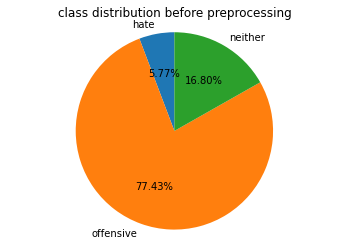

KeyError: 'count'

In [60]:
# Visualize the distribution of the data before and after pre-processing.
import matplotlib.pyplot as plt

#BEFORE
labels = ['hate','offensive','neither']
sections = raw_data.groupby('class').agg('count')['count']
print(sections)
plt.pie(sections, labels=labels,
        startangle=90,
        explode = (0, 0, 0),
        autopct = '%1.2f%%')
plt.axis('equal') # Try commenting this out.
plt.title('class distribution before preprocessing')
plt.show()

#AFTER
p1_labels = ['hate','offensive OR neither']
p1_class_counts = p1_train.groupby('class').agg('count')['count']
print(p1_class_counts)
plt.pie(p1_class_counts, labels=p1_labels,
        startangle = 90,
        explode = (0, 0),
        autopct = '%1.2f%%')
plt.axis('equal') # Try commenting this out.
plt.title('class distribution after preprocessing (p1)')
plt.show()


p2_labels = ['hate OR offensive','neither']
p2_class_counts = p2_train.groupby('class').agg('count')['count']
plt.pie(p2_class_counts, labels=p2_labels,
        startangle = 90,
        explode = (0, 0),
        autopct = '%1.2f%%')
plt.axis('equal') # Try commenting this out.
plt.title('class distribution after preprocessing (p2)')
plt.show()

## Parsing Dependency Trees (CoNLL)
<font color = "green">see *./parse_conll.py*</font>

<font color = "green">Input:</font>
* <font color = "green">_data/p1_train.csv_</font>
* <font color = "green">_data/p1_test.csv_</font>
* <font color = "green">_data/p2_train.csv_</font>
* <font color = "green">_data/p2_test.csv_</font>

<font color = "green">Output:</font>
* <font color = "green">_data/p1_train_parsed.csv_</font>
* <font color = "green">_data/p1_test_parsed.csv_</font>
* <font color = "green">_data/p2_train_parsed.csv_</font>
* <font color = "green">_data/p2_test_parsed.csv_</font>

We used the python library **tweebo-parser-python-api** to convert our preprocessed tweets into dependency trees, which were then stored as strings in CoNLL format. 

Tweebo constructs dependency trees where nodes are individual words in an input string, and the meaning of a parent node, in the context of the sentence, is dependent on child nodes.

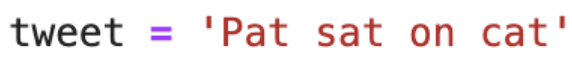

CoNLL format: 
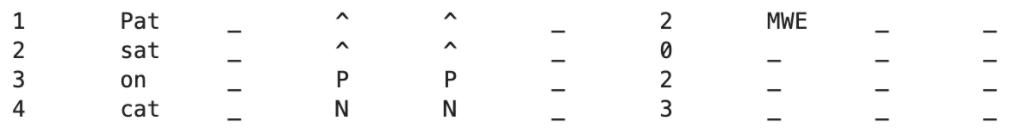

Dependency tree: 

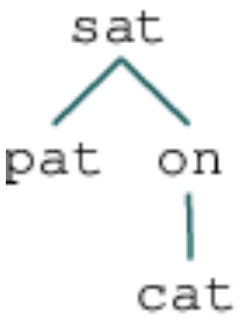

# Models and Evaluation

## Experimental Setup
<font color = "green">*see ./preprocess.py*</font>

We concluded that there was enough data such that  cross validation wasn't necessary, and we wanted to test on data that had no influence on training. Therefore, we did an __80%-20% train-test split__ for both problems. 

We evaluated our models based on their test accuracy on problems 1 and 2. 

Generally, our experimental setup is the same as HW4, with our kernels in the place of ngram and tfidf. 

```
accuracy = (correctly classified examples) / (total examples)
```






## Baselines 
<font color = "green">see *./baseline/**</font>

We looked at two baselines:

1: Because this project is expanding on HW4, we first used the original HW4 as a baseline (ngram, tfidf applied to "bag of words" examples).

| Classifier     | Problem 1 accuracy | Problem 2 accuracy    | 
| ----------- | ----------- |----------- |
| HW4 TFIDF | 90.3% |69.6%|
| HW4 ngram (n=3) |92.3%|75.35% |

2: 
The ressearchers who collected the data[1] built their own classifier, so we used this as a second baseline. They treated it as a 3 class classification problem rather than a binary one, and didn't do class-balancing. 

For directly comparable accuracy measure, we had to deduce how a binary classifier that used their trained 3-classifier (merging the appropriate labels) would perform on our class-balanced data. 


For example, we assume that they would classify 61% of our hate speech examples as hate speech, as they did on their own examples, but because we class-balanced, this has a greater influence on the accuracy for our problem 2 than on their own problem.  

From their confusion matrix (figure below), we estimated these accuracies:

| Classifier    | Problem 1 accuracy | Problem 2 accuracy    | 
| ----------- | ----------- |----------- |
| Davidson et al., 2017*| ~95% |~80% |



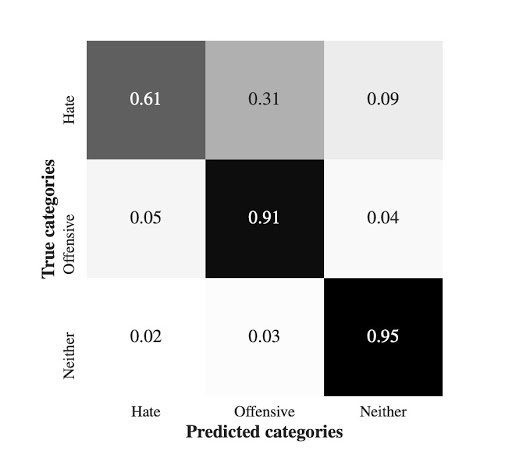



## Methods
<font color = "green">see *driver_functions.py* for the correct usage of our methods.</font>

<font color = "green">Input:</font>
* <font color = "green">_data/p1_train_parsed.csv_</font>
* <font color = "green">_data/p1_test_parsed.csv_</font>
* <font color = "green">_data/p2_train_parsed.csv_</font>
* <font color = "green">_data/p2_test_parsed.csv_</font>



### Model (Pegasos)
<font color = "green">*see ./dualsvm_unused.py, ./models.py*</font>
We used Kernel Pegasos to solve our classification problems because it is simple and effective. We also implemented a dual SVM, but did not use it since we were not guaranteed positive definite matrices from our kernels.
The trainning was done by one epoch update over all trainning samples


### Model (SVM)
<font color = "green">*see ./dualsvm_unused.py, ./models.py*</font>

Originally, we planned to replace hw4's model with an implementation of the dual formulation of an SVM, and use quadratic programming [7]. We did implement this model, but we were unable to use it with our novel kernels. This SVM implementation needs to recieve a positive definite kernel matrix (which implies a convex quadratic program). Our text-based kernels are not mathematically rigorous, meaning the evaluation function can't be reformulated as a dot product between vector-valued functions of two examples. The stricter definition of a kernel is required for the kernel matrix to be positive definite. We instead decided to use HW4's KernelPegasos model, as it is already shown to work with abstract, text-input kernels. 

### Kernels
<font color = "green">*see ./kernel.py*</font>

We developed kernels that make use of the dependency trees, and generate kernel matrices that can be fed into the HW4 KernelPegasos model. 

There are two ways to divide a single dependency tree into a set of meaningful components: 
* find all subgraphs of the tree
* find all related pairs (a pair of words that share an edge)

Then, there are two ways we can evaluate similarity between two sets of components:
* simply compute (size of intersection) / (size of union) 
* use the Term Frequency, Inverse Document Frequency formula (TFIDF), where documents are tweets, and terms are components

Varying these options, we have four possible kernels:
* SimplePairsKernel
* SimpleSubgraphsKernel
* TFIDFPairsKernel
* TFIDFSubgraphsKernel 


##Results 
| Kernel     | Problem 1 accuracy | Problem 2 accuracy    | 
| ----------- | ----------- |----------- |
| Simple Pairs      | 76.5%      | 59.09%      |
| Simple Subgraphs  |   90.8%   | 65.91%       |
| TFIDF Pairs     | 76.2%       | 61.01%       |
| TFIDF Subgraphs  | 90.9%       | 69.76%       |

| Baseline Classifier    | Problem 1 accuracy | Problem 2 accuracy    | 
| ----------- | ----------- |----------- |
| HW4 TFIDF | 90.3% |69.6%|
| HW4 ngram (n=3) |92.3%|75.35% |
| Davidson et al., 2017*| ~95% |~80% |

<small>*See the baselines section</small> 

These results confirm the intuition that problem 2 is harder than problem 1; every single model performs significantly better on problem 1.

Our best-performing kernel is TFIDF Subgraphs. This did not surprise us - it is arguably the most complex of the four. Subgraphs is a superset of related pairs, and TFIDF is more comprehensive than simple intersection/union. 

Subgraphs TFIDF beat HW4 "bag of words" TFIDF by 0.25% - just barely. We interpret this to mean that the tweebo subgraphs are barely more informative than a bag of words, when fed through TFIDF and a dual SVM. This leaves us wondering whether or not the information tweebo provides is meaningful to this problem. It is possible that the SVM was not complex enough to hardness tweebo's power, and that putting the subgraph information through a neural network may yield good results. 

The best performing models were  HW4 ngram and Davidson et al., 2017, both of which use ngram. We were not initially drawn to ngram for this problem, but in hindsight its success makes sense - ngram can help account for a major problem with using tweets: "proper" english is rarely used. ngram finds similarity between "hello" and "hellooooo", where our kernels will see two unrelated words. We tried to account for this issue in a different way, by preprocessing for misspellings. Unfortunately, this lowered our accuracy. 




## Explore text generator

The following are some hate speech we have generated with neural network using tensorflow packages

In [ ]:
new_hate = pd.read_csv('data/new_hate_speech.csv')
new_hate[:10]

,new_hate_speech
0,he's white
1,he's he's a faggot faggot if he stupid bitch d...
2,faggot bitch he's a faggot a hoe u don't bitch
3,he's he's a faggot for the school im was trash...
4,when he's trash trash trash queer
5,is a faggot bitch he pussy if the faggot is im...
6,fag this trash and trash if you look this a fa...
7,niggas don't bitch he's if the
8,y was the faggot pussy sit it as the
9,bitch you can and because a hoes and you can c...


# Discussion

## What you've learned


This project gave us some clarity on the intricacies of Homework 4 that we didn't totally understand when solving that homework. We thought that we would try a dual SVM as another approach, but that required a positive-definite kernel matrix. We realized the abstract definition of a kernel as a similarity measure does not guarantee a PD kernel matrix. Therefore the kernels that we created did not necessarily guarantee a convex solution, so we needed to use the KernelPegasos model. 

This project gave us first-hand experience in high time complexity and poorly scalable algorithms. The SimpleSubgraphs kernel took hours to complete. For one, it was O(N^2), because every training example needed to be compared to every other training example to precompute the kernel matrix. This may not have been expensive had the kernel function itself not been extremely arduous. Since the algorithm was meant to capture every possible subgraph, the time complexity was extremely high. Due to varying tree structures we did not calculate it exactly, but know that it is somewhere between O(2^L) and O(2^K), where L is number of leaves in the dependency graph and K is the total number of nodes. Either way, this made the algorithm probably impractical to actually deploy. In future ML projects, we will be sure analyze the complexity of any methods we were planning to be sure that we would not spend time on something infeasible.     

If we were to start over, concepts from the second half of the class like HMM’s or RNN's would have been helpful to capture sentence dependencies that we tried to accomplish with our custom kernels, but we hadn’t learned these when planning the project.


## References 

[1] Thomas Davidson, Dana Warmsley, Michael Macy, and Ingmar Weber. 2017. "Automated Hate Speech Detection and the Problem of Offensive Language." ICWSM.

[2] Nastase, Vivi, Jelber Sayyad, and Maria Fernanda Caropreso. 2007. Using dependency relations for text classification. Technical Report TR-2007-12, University of Ottawa. 

[3] Pak, A., Paroubek, P.: Text representation using dependency tree subgraphs for sentiment analysis. In: Xu, J., Yu, G., Zhou, S., Unland, R. (eds.) DASFAA Workshops 2011. LNCS, vol. 6637, pp. 323–332. Springer, Heidelberg (2011)

[4] Lingpeng Kong, Nathan Schneider, Swabha Swayamdipta, Archna Bhatia, Chris Dyer, and Noah A. Smith. 2014. A dependency parser for tweets. In Proc. of EMNLP, pages 1001–1012, Doha, Qatar, October.

[5]Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

[6] Sap, M., Card, D., Gabriel, S., Choi, Y., & Smith, N. A. (2019, July). The risk of racial bias in hate speech detection. In Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics (pp. 1668-1678).

[7] Sandipan Dey. “Implementing a Soft-Margin Kernelized Support Vector Machine Binary Classifier with Quadratic Programming in R and Python.” Sandipanweb, 23 Apr. 2018, https://sandipanweb.wordpress.com/2018/04/23/implementing-a-soft-margin-kernelized-support-vector-machine-binary-classifier-with-quadratic-programming-in-r-and-python/.

[8] Jeremy Chow, Simple Text Generation, Dec. 4th 2019  https://towardsdatascience.com/simple-text-generation-d1c93f43f340

## Python libraries:
* nltk
* graphviz
* tweebo-parser-python-api
* pandas
* numpy
* re
* sklearn
* math
* pickle 
* tensorflow
* keras


